In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as TTS
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score as AS, confusion_matrix as CM, classification_report as CR
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('IRIS.csv')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


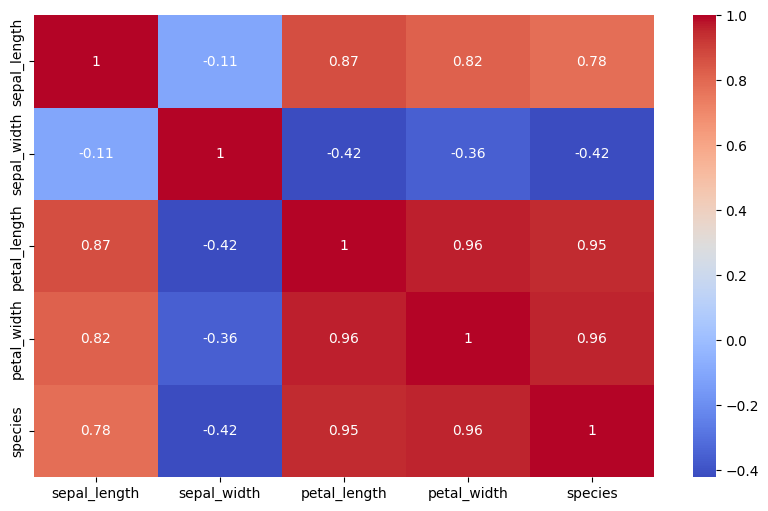

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [6]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
data['species'] = LE().fit_transform(data['species'])

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
X = data.drop('species', axis=1)
y = data['species']

In [10]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
data.shape

(150, 5)

In [12]:
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.25,random_state=2)

In [14]:
X.shape, X_train.shape, X_test.shape

((150, 4), (112, 4), (38, 4))

In [15]:
lr = LR(max_iter=1000)

In [16]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = lr.predict(X_test)

In [22]:
print("Accuracy Score: ",AS(y_test,y_pred))
print("Confusion Matrix: \n",CM(y_test,y_pred))
print("Classification Report: \n",CR(y_test,y_pred))

Accuracy Score:  0.9736842105263158
Confusion Matrix: 
 [[16  0  0]
 [ 0 10  1]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



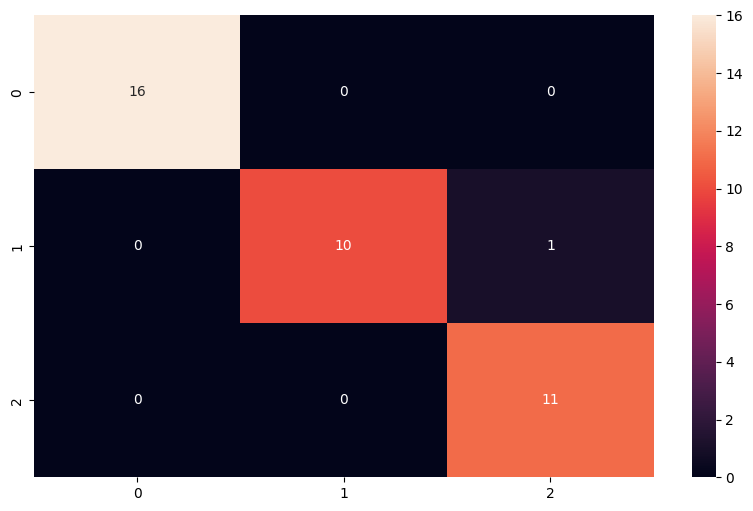

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(CM(y_test,y_pred),annot=True,fmt='d')
plt.show()